<a href="https://colab.research.google.com/github/yk-Jeong/DS_study/blob/main/3%EC%A3%BC%EC%B0%A8_20221114_%EB%BF%85%EB%BF%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 미션 전 사전 준비

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding='cp949')

In [200]:
# 데이터 세트 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

---

📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

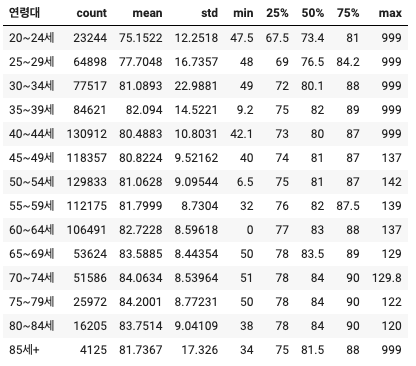

In [201]:
# 딕셔너리 

age_code = {1: '0~4세', 2: '5~9세', 3: '10~14세', 4: '15~19세', 5: '20~24세', 
           6: '25~29세', 7: '30~34세', 8: '35~39세', 9: '40~44세', 10: '45~49세', 
           11: '50~54세', 12: '55~59세', 13: '60~64세', 14: '65~69세', 15: '70~74세', 
           16: '75~79세', 17: '80~84세', 18: '85세+'}

In [202]:
# 컬럼명과 내부 데이터 변환

df['연령대'] = df['연령대코드(5세단위)'].replace(age_code)

In [203]:
waist_by_age = df['허리둘레'].groupby(df['연령대'])
waist_by_age.describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [185]:
# 상관계수 

corr_df = df[["음주여부", "흡연상태", "연령대", "성별코드"]].corr()
corr_df

,음주여부,흡연상태,성별코드
음주여부,1.000000,0.352014,-0.368630
흡연상태,0.352014,1.000000,-0.588491
성별코드,-0.368630,-0.588491,1.000000


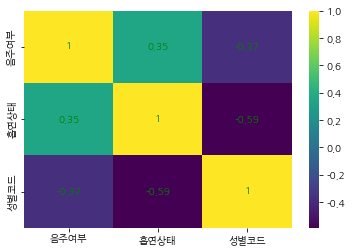

In [186]:
# 시각화 

import matplotlib.pyplot as plt

ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='viridis')
plt.show()

📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [187]:
## 제공되는 데이터 

# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

In [188]:
# 정규식을 활용해 컬럼명과 내부 데이터 변환

df['흡연상태'].replace(smoke, inplace = True)
df['음주여부'].replace(drink, inplace = True)
df.rename(columns={'흡연상태':'흡연', '음주여부':'음주'}, inplace=True)

In [189]:
# 교차 테이블

drink_by_smoke = pd.crosstab(df['흡연'], df['음주'], margins=True)
drink_by_smoke.T

흡연,끊음,흡연안함,흡연중,All
음주,,,,
마심,120779,213743,162166,496688
안마심,55334,394503,52845,502682
All,176113,608246,215011,999370


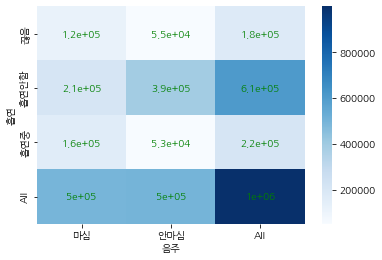

In [190]:
# 시각화 

ax = sns.heatmap(drink_by_smoke, annot=True, annot_kws=dict(color='g'), cmap='Blues')
plt.show()

📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

- 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.


In [215]:
# 데이터 추출

mask1 = (df['체중(5Kg 단위)'] >= 120)
over_120 = df[mask1] 
over_120 = over_120[['총콜레스테롤', '감마지티피', '음주여부']]
over_120

,총콜레스테롤,감마지티피,음주여부
1219,182.0,47.0,0.0
2309,107.0,19.0,0.0
3497,214.0,111.0,1.0
3685,218.0,58.0,0.0
5788,194.0,35.0,0.0
...,...,...,...
996544,244.0,76.0,1.0
996828,194.0,82.0,1.0
997152,208.0,165.0,0.0
997414,197.0,62.0,0.0


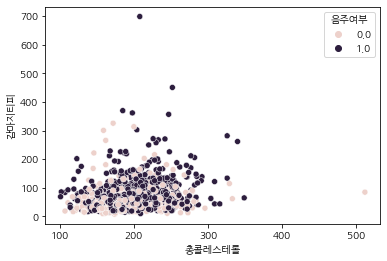

In [216]:
sns.scatterplot(data=over_120, x='총콜레스테롤', y='감마지티피', hue='음주여부')

📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [204]:
df['성별코드'].replace({1:'남성', 2:'여성'}, inplace = True)
df.rename(columns={'성별코드':'성별'}, inplace=True)

In [205]:
eyesight = df[['연령대코드(5세단위)','성별', '시력(좌)', '시력(우)']]
eyesight

,연령대코드(5세단위),성별,시력(좌),시력(우)
0,13,남성,1.0,1.2
1,8,여성,1.2,1.0
2,8,남성,1.0,0.8
3,12,여성,0.9,1.0
4,8,남성,1.5,1.5
...,...,...,...,...
999995,9,여성,1.5,1.5
999996,9,여성,1.2,1.5
999997,12,여성,0.2,1.0
999998,11,남성,0.8,0.9


In [206]:
# 시력 9.9 삭제 

mask2 = (eyesight['시력(좌)'].isin([9.9]) | eyesight['시력(우)'].isin([9.9]))
eyesight = eyesight[~mask2]
eyesight

,연령대코드(5세단위),성별,시력(좌),시력(우)
0,13,남성,1.0,1.2
1,8,여성,1.2,1.0
2,8,남성,1.0,0.8
3,12,여성,0.9,1.0
4,8,남성,1.5,1.5
...,...,...,...,...
999995,9,여성,1.5,1.5
999996,9,여성,1.2,1.5
999997,12,여성,0.2,1.0
999998,11,남성,0.8,0.9


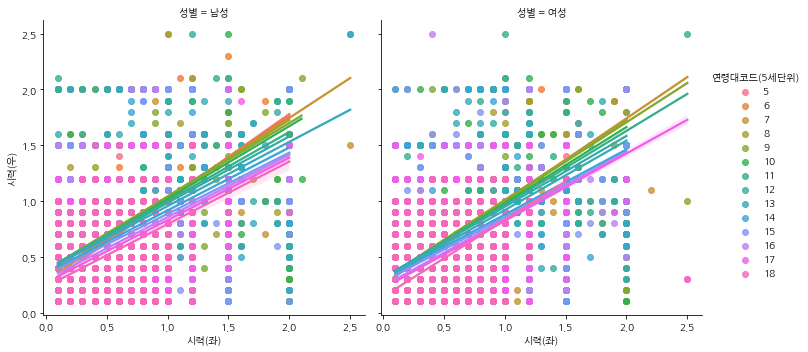

In [209]:
sns.lmplot(data=eyesight, x='시력(좌)', y='시력(우)', hue='연령대코드(5세단위)', col='성별')